<a href="https://colab.research.google.com/github/nhrishi/1.1.0-experimental_bin/blob/master/TradingIntel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, tanh, sigmoid

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json as json

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#pip install fyers_apiv3

In [3]:
pip install fyers_apiv3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.8.0
    Uninstalling websocket-client-1.8.0:
      Successfully uninstalled websocket-client-1.8.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.9.5
    Uninstalling aiohttp-3.9.5:
      Successfully uninstalled aiohttp-3.9.5


In [111]:
from fyers_apiv3 import fyersModel

client_id = "Q9Y3IP8H5W-100"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTYzOTUzMzcsImV4cCI6MTcxNjQyNDI1NywibmJmIjoxNzE2Mzk1MzM3LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVRoMUo5UzE1ZmxOaWJkdU5hNHI3bmNXNENic2Q1OUpCQVdJNHVDMkNGRVp6ZzBJNmxlRHdWT0dvRHRwTVlpRkFlU1h3UFBmLTBLeEl1UUQ5RGVTN0ZzM0F5S19ic2lDWlhYc2lHTEV3UWRmQUw0ND0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.xKhc8ITo4gcFm-wR18GskF2rhfrCXuj4IcM38ZpWi4Y"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTY0ODI3NjUsImV4cCI6MTcxNjUxMDYwNSwibmJmIjoxNzE2NDgyNzY1LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVQzTE5ydkZlZUN2bVBPc1dIOFc3VmdPVHVsZFE0cTVzNVkwTkZwdlJBOW1pVWpxaE1TRTJrdXVtWUd1ZFNzVmZ1UlBkdW1TZnFqSk5hdEFFR0FVdDR3SGZJb2pka3BvN1VWLTJob2w5bnEzTzktVT0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.SdE2jvKJzWzBBL3Syd5dOb3OOTCdfX200YCOYpDQ7mg"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTY2NDUwNDAsImV4cCI6MTcxNjY4MzQ0MCwibmJmIjoxNzE2NjQ1MDQwLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVVleXdaRmZ2azZiNE45aEFjQ1diaktvZlBzMjdsT25SYUZSZ0tEZTltMVNFVWQzOEJLeVpZLU4yVThQOTc3aDJCMzhCT1UyTFZMRzdESDVaZDVhNkF5RTBZOXRnREk5UmVZUXJnX2FnTnFqV2xCTT0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.nRdj7mirn1GyfHi76dKsLeTOCeFO-kDXCBr1UNvJ11w"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTY4MjM4MzcsImV4cCI6MTcxNjg1NjIzNywibmJmIjoxNzE2ODIzODM3LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVZLY2RKRWlJZU4zM21VM2picmpWUGE4a25hVzdhNm55akphNzNnVzNnWWdvLUxrTDkwbnJ1S0ZRUml2Zmdnd0JWdmxuVzhBek9WVnlZT2hEcXhMUmsyVUIyQThTdmdTcHJsaU9MdUxreUtnWlJGcz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.osdu8vvA9G-u6q7thuckcrcM1mlobEsO11jeJ-CboUU"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcwNzk0NTMsImV4cCI6MTcxNzExNTQ1MywibmJmIjoxNzE3MDc5NDUzLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdJMmR2ZzVUMWdHN3Y2MWQxREZ6NVdnY2N5RVJDTWFvb1MwUWhQR2sxeVdXemliT09yOG1KcWRkZ1p4MUVocFVXUGZ1WWFhTEVkaU9kLW9YOGpDSWhUYmYweDNaNU9IZWpBYUEwTUFzU0RqOUZrcz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.bG80faOjboOpVA10781e7mHw7D5qH0P9t3kQlC_TZfs"
access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcwNzk5MzEsImV4cCI6MTcxNzExNTQ1MSwibmJmIjoxNzE3MDc5OTMxLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdJOTdrQ19seDQzZEM4S1FhMGlRQ3pFNjg1Ti1rYlZiN3ROQ3E2QU1ubU95eU9kcUFaQms2ZzJNalhFQXFQWkpYeS1fMnJlSXhycWF4eWw4RklwcFNNc3BmclNhdHhMSHB6Z1p5MERIRV94Qk1Qaz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.6iCpNueqfkemVbnVBfC_N6vVbMoZM2mxiDCO9mnfCzA"
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

#yyyy-mm-dd
#Daily data Extraction
daily_data = {
    "symbol":"NSE:SBIN-EQ",
    "resolution":"D",
    "date_format":"1",
    "range_from":"2023-10-01",
    "range_to":"2024-05-29",
    "cont_flag":"1"
}

response = fyers.history(data=daily_data)
print(response)
daily_data_json = json.dumps(response)
daily_data_df = json.loads(daily_data_json)
print(daily_data_df['candles'])
pricing_daily_data = daily_data_df['candles']
daily_df = pd.DataFrame(pricing_daily_data)
daily_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


#hourly data Extraction
hourly_data = {
    "symbol":"NSE:SBIN-EQ",
    "resolution":"60",
    "date_format":"1",
    "range_from":"2024-03-01",
    "range_to":"2024-05-29",
    "cont_flag":"1"
}

response = fyers.history(data=hourly_data)
print(response)
hourly_data_json = json.dumps(response)
hourly_data_df = json.loads(hourly_data_json)
print(hourly_data_df['candles'])
pricing_hourly_data = hourly_data_df['candles']
hourly_df = pd.DataFrame(pricing_hourly_data)
hourly_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


import datetime
daily_df['date'] = pd.to_datetime(daily_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(daily_df)

hourly_df['date'] = pd.to_datetime(hourly_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(hourly_df)


{'candles': [[1696291200, 596.6, 604.9, 589.6, 602.95, 15322196], [1696377600, 600, 600.45, 584.45, 586.25, 24914612], [1696464000, 590, 594.35, 587.1, 592.15, 13248028], [1696550400, 593.4, 598.95, 592.2, 594.25, 8216780], [1696809600, 588, 589, 581.55, 585.1, 9189597], [1696896000, 587, 595, 585.75, 591.65, 10373508], [1696982400, 596.9, 597, 587.6, 588.35, 14220119], [1697068800, 590.8, 593, 585, 586.05, 11983797], [1697155200, 577.75, 581.3, 574.8, 576.15, 19064577], [1697414400, 576, 578.75, 571.5, 575.65, 11290293], [1697500800, 577.7, 579.95, 575.3, 576.45, 10765224], [1697587200, 577.75, 579.25, 569.35, 572.65, 11777454], [1697673600, 569.8, 574, 567, 571.2, 11441499], [1697760000, 569.9, 570, 562.1, 563.1, 11110988], [1698019200, 563.1, 566, 551, 552.95, 11875035], [1698192000, 558.6, 560.8, 553.6, 556.2, 12134624], [1698278400, 551.45, 552.9, 543.2, 547, 19424825], [1698364800, 550, 562.5, 550, 561.15, 10415296], [1698624000, 563, 566.7, 556.5, 565.2, 8593704], [1698710400, 5

In [ ]:
#hourly_df.set_index('date', inplace=True)
#daily_df.set_index('date', inplace=True)

In [112]:
# Moving Average 20
#daily_df['MA_20'] = daily_df['close'].rolling(window=20).mean()
#daily_df.dropna(inplace=True)
#print(daily_df)

####### Daily MACD calculations ######
# Calculate the 5-period EMA Daily
daily_df['DAILY_EMA5'] = daily_df['close'].ewm(span=5, adjust=False).mean()

# Calculate the 13-period EMA Daily
daily_df['DAILY_EMA13'] = daily_df['close'].ewm(span=13, adjust=False).mean()

# Calculate the 12-period EMA Daily
daily_df['DAILY_EMA12'] = daily_df['close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA Daily
daily_df['DAILY_EMA26'] = daily_df['close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
daily_df['DAILY_MACD'] = daily_df['DAILY_EMA12'] - daily_df['DAILY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
daily_df['DAILY_SIGNAL'] = daily_df['DAILY_MACD'].ewm(span=9, adjust=False).mean()

####### Daily RSI calculations ######

delta = daily_df['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
daily_df['DAILY_RSI'] = 100 - (100 / (1 + RS))


####### Hourly MACD calculations ######

# Calculate the 5-period EMA Hourly
hourly_df['HOURLY_EMA5'] = hourly_df['close'].ewm(span=5, adjust=False).mean()

# Calculate the 13-period EMA Hourly
hourly_df['HOURLY_EMA13'] = hourly_df['close'].ewm(span=13, adjust=False).mean()

# Calculate the 12-period EMA Hourly
hourly_df['HOURLY_EMA12'] = hourly_df['close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA Hourly
hourly_df['HOURLY_EMA26'] = hourly_df['close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
hourly_df['HOURLY_MACD'] = hourly_df['HOURLY_EMA12'] - hourly_df['HOURLY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
hourly_df['HOURLY_SIGNAL'] = hourly_df['HOURLY_MACD'].ewm(span=9, adjust=False).mean()

####### Hourly RSI calculations ######

delta = hourly_df['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
hourly_df['HOURLY_RSI'] = 100 - (100 / (1 + RS))


#### Drop rows with NaN values created by indicators calculation

daily_df.dropna(inplace=True)
hourly_df.dropna(inplace=True)

print(daily_df.shape)
print(hourly_df.shape)

(150, 14)
(392, 14)


In [113]:
print(daily_df.shape)
print(hourly_df.shape)

(150, 14)
(392, 14)


In [114]:
## Aggregate hourly data into daily

# Define the aggregation functions for each feature
aggregation_functions = {
    'close': ['mean', 'max', 'min'],
    'volume': ['sum'],
    'HOURLY_RSI': ['mean', 'max', 'min'],
    'HOURLY_MACD': ['mean', 'max', 'min'],
    'HOURLY_EMA5': ['mean', 'max', 'min'],
    'HOURLY_EMA13': ['mean', 'max', 'min'],
    'HOURLY_EMA26': ['mean', 'max', 'min']
}

# Convert the 'date' column to a DatetimeIndex
hourly_df['date'] = pd.to_datetime(hourly_df['date'])

# Resample the hourly data to daily data
daily_aggregated = hourly_df.resample('D', on='date').agg(aggregation_functions)

# Flatten the column hierarchy
daily_aggregated.columns = ['_'.join(col).strip() for col in daily_aggregated.columns.values]
daily_aggregated.reset_index(inplace=True)

In [115]:
print(daily_aggregated.shape)


(87, 20)


In [116]:
# Merge the daily data with the aggregated hourly data
# Convert the 'date' column in daily_aggregated to datetime64[ns]
daily_df['date'] = pd.to_datetime(daily_df['date'])
daily_aggregated['date'] = pd.to_datetime(daily_aggregated['date'])

# Merge the daily data with the aggregated hourly data
combined_df = pd.merge(daily_df, daily_aggregated, left_on='date', right_on='date', how='inner')

# Drop the 'Datetime' column if it exists
if 'Datetime' in combined_df.columns:
    combined_df.drop(columns=['Datetime'], inplace=True)

# Print the combined DataFrame
print(combined_df.shape)

(57, 33)


In [117]:
# Normalize features
scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(combined_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'HOURLY_RSI_max', 'HOURLY_RSI_min', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26', 'HOURLY_EMA5_mean', 'HOURLY_EMA13_mean', 'HOURLY_EMA26_mean' ]])
scaled_data = scaler.fit_transform(combined_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'HOURLY_RSI_mean', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26' ]])

print(scaled_data)

[[4.39035487e-01 9.88441486e-01 7.85438032e-01 1.00000000e+00
  1.82675861e-01 9.05440905e-01 3.14832912e-01 1.17104807e-01
  0.00000000e+00]
 [5.47315742e-01 1.00000000e+00 7.36145424e-01 9.88704921e-01
  3.54406467e-01 8.23019265e-01 3.80730721e-01 1.72971060e-01
  4.95190339e-02]
 [5.46860783e-01 9.96122927e-01 8.34358703e-01 9.78855071e-01
  5.32799049e-01 7.23994115e-01 4.24483878e-01 2.20766488e-01
  9.53263063e-02]
 [5.84622384e-01 9.93698636e-01 8.31243514e-01 9.70466340e-01
  3.00796086e-01 5.87584209e-01 4.68486047e-01 2.69198243e-01
  1.41366304e-01]
 [4.54049136e-01 9.32967060e-01 6.35235071e-01 9.51007969e-01
  3.27290547e-01 3.42392301e-01 4.46529439e-01 2.84901077e-01
  1.71458330e-01]
 [3.26660601e-01 8.28370403e-01 3.83477141e-01 9.13486732e-01
  4.25601835e-01 4.00704846e-02 3.81851323e-01 2.73180066e-01
  1.87089509e-01]
 [2.13375796e-01 6.95581386e-01 3.27608207e-01 8.55597704e-01
  5.58450448e-01 0.00000000e+00 2.94232385e-01 2.40740750e-01
  1.90685252e-01]
 [1.56

In [118]:
print(scaled_data.shape)

(57, 9)


In [130]:
# Create sequences for LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length, 0])  # Assuming 'Close' is the first column
    return np.array(sequences), np.array(labels)


# If the input data is not a 2D array, reshape it
if len(scaled_data.shape) != 2:
    scaled_data = scaled_data.reshape(-1, 1)

SEQ_LENGTH = 5  # 60 days sequence
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split into training and test sets
split = int(0.6 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [131]:
#print(X)
#print("------")
#print(y)
# print(len(scaled_data))
# print(scaled_data.shape)
# print(len(combined_df))
# print(X_train.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31, 5, 9)
(31,)
(21, 5, 9)
(21,)


In [30]:
# if len(X_train.shape) == 3:
#     X_train = np.expand_dims(X_train, axis=2)

In [132]:
print(X_train.shape)

(31, 5, 9)


In [139]:
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='tanh',return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.1480 - val_loss: 0.7385
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 0.1283 - val_loss: 0.6753
Epoch 3/100
1/1 [==============================] - 0s 50ms/step - loss: 0.1166 - val_loss: 0.6141
Epoch 4/100
1/1 [==============================] - 0s 66ms/step - loss: 0.1027 - val_loss: 0.5533
Epoch 5/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0887 - val_loss: 0.4924
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0778 - val_loss: 0.4306
Epoch 7/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0684 - val_loss: 0.3681
Epoch 8/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0560 - val_loss: 0.3056
Epoch 9/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0483 - val_loss: 0.2458
Epoch 10/100
1/1 [==============================] - 0s 56ms/step - loss: 0.0419 - val_loss: 0.1912
Epoch 11/100
1/1 [===

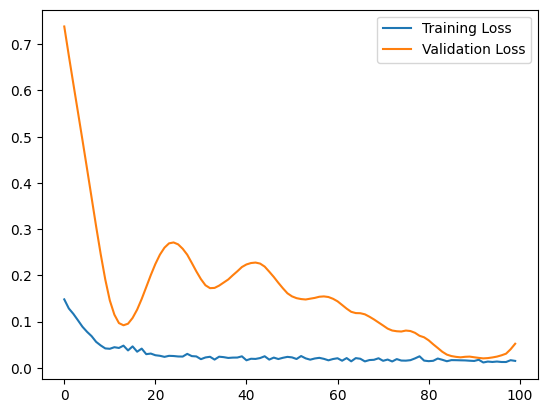

1/1 [==============================] - 1s 1s/step


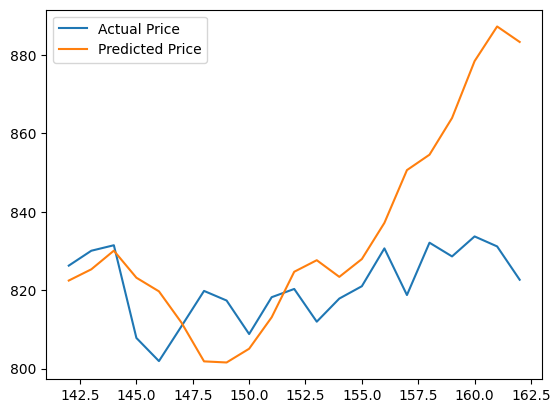

[822.44466733 825.31177121 830.06682889 823.1665511  819.68796643
 811.70236723 801.82977061 801.5476646  805.05194708 813.08112054
 824.68517831 827.63183863 823.3861059  827.92809382 837.15179946
 850.61508032 854.54567262 863.90739181 878.40927554 887.25022597
 883.30141004]


In [140]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0]

# Plot predicted vs actual prices
plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0], label='Actual Price')
plt.plot(daily_df.index[-len(y_test):], predicted_prices, label='Predicted Price')
plt.legend()
plt.show()

print(predicted_prices)
